
## **About Fashion-MNIST Dataset**:

Fashion-MNIST is a dataset images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels:Each training and test example is assigned to one of the following labels:

   1. T-shirt/top
   2. Trouser
   3. Pullover
   4. Dress
   5. Coat
   6. Sandal
   7. Shirt
   8. Sneaker
   9. Bag
   10. Ankle boot

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

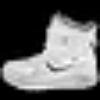

In [ ]:
cv2_imshow(cv2.resize(X_train[0],(100,100)))

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
#same as doing one-hot-encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import numpy as np

In [ ]:
#conv2d expects a 4D tensor as input
X_train = np.expand_dims(X_train,axis = 3)
X_test = np.expand_dims(X_test,axis = 3)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
#model initialization
model = Sequential()
#first convolution layer
model.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
#second convolution layer
model.add(Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2)))
#flattening
model.add(Flatten())
#First dense layer
model.add(Dense(32,activation = 'relu'))
model.add(BatchNormalization()) #to reduce variance
model.add(Dropout(0.5)) #regularization
#Second dense layer
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization()) #to reduce variance
model.add(Dropout(0.5)) #regularization
#output layer
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=300,validation_data=(X_test,y_test))

Epoch 1/20
200/200 [==============================] - 61s 307ms/step - loss: 1.0242 - accuracy: 0.6503 - val_loss: 1.1165 - val_accuracy: 0.7902
Epoch 2/20
200/200 [==============================] - 60s 300ms/step - loss: 0.5530 - accuracy: 0.8105 - val_loss: 0.3778 - val_accuracy: 0.8826
Epoch 3/20
200/200 [==============================] - 62s 311ms/step - loss: 0.4521 - accuracy: 0.8473 - val_loss: 0.3173 - val_accuracy: 0.8905
Epoch 4/20
200/200 [==============================] - 60s 298ms/step - loss: 0.3996 - accuracy: 0.8671 - val_loss: 0.3145 - val_accuracy: 0.8822
Epoch 5/20
200/200 [==============================] - 60s 298ms/step - loss: 0.3689 - accuracy: 0.8781 - val_loss: 0.2919 - val_accuracy: 0.8987
Epoch 6/20
200/200 [==============================] - 60s 301ms/step - loss: 0.3423 - accuracy: 0.8831 - val_loss: 0.2693 - val_accuracy: 0.9045
Epoch 7/20
200/200 [==============================] - 59s 297ms/step - loss: 0.3253 - accuracy: 0.8916 - val_loss: 0.2723 - val_ac

In [ ]:
test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2689 - accuracy: 0.9166


In [ ]:
test_accuracy

[0.26885291934013367, 0.9165999889373779]

In [ ]:
obj = history.history

In [ ]:
accuracy = obj['accuracy']
val_accuracy = obj['val_accuracy']

loss = obj['loss']
val_loss = obj['val_loss']

x_axis_vals = np.arange(len(accuracy))

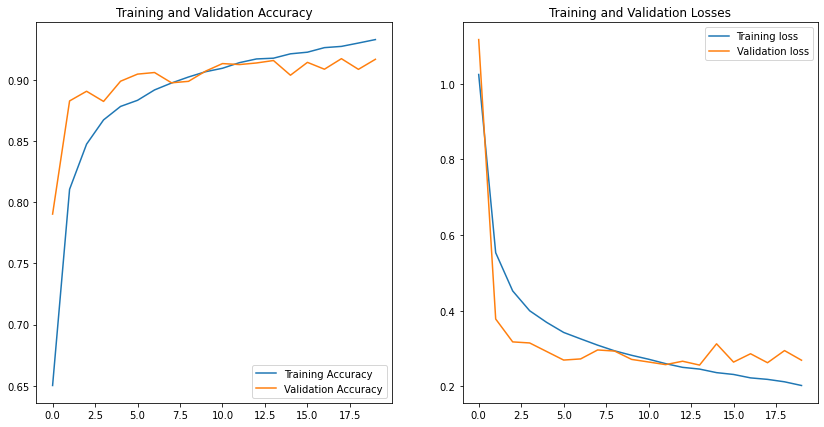

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
plt.plot(x_axis_vals, accuracy, label='Training Accuracy')
plt.plot(x_axis_vals, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(x_axis_vals, loss, label='Training loss')
plt.plot(x_axis_vals, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Losses')

plt.show()